__Goal__: Predict number of bikes (`cnt`) people rent at certain hours, using all columns except `casual` and `registered`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<AxesSubplot:>

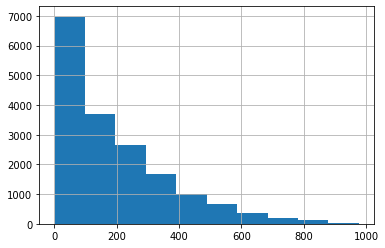

In [4]:
bike_rentals['cnt'].hist()

In [5]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

<AxesSubplot:>

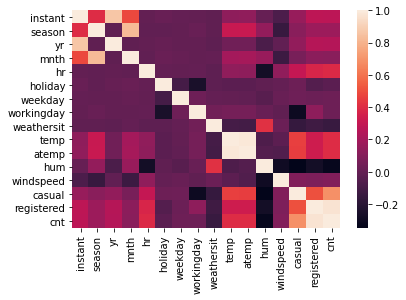

In [6]:
sns.heatmap(bike_rentals.corr())

In [7]:
def assign_labels(num):
    '''
    Classifies each hour as 1,2,3,4 for morning, afternoon, evening, night respectively
    '''
    if (num >6) & (num <12):
        return 1
    elif (num >=12) & (num <=18):
        return 2
    elif (num > 18) & (num < 24):
        return 3
    else:
        return 4

In [8]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_labels)

In [9]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


RMSE is picked for error metric for ease of interpretability across algorithm types.

In [10]:
train = bike_rentals.sample(frac=0.8,random_state = 42)
test = bike_rentals.iloc[~bike_rentals.index.isin(train.index)]

In [11]:
columns = list(bike_rentals.columns)
for r in ['cnt','casual','dteday','registered']:
    # all of these are used to calculate cnt
    columns.remove(r)
    
target = 'cnt'

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
lr = LinearRegression()
lr.fit(train[columns],train[target])

LinearRegression()

In [15]:
predict_lr = lr.predict(test[columns])
mse_lr = mean_squared_error(y_true=test['cnt'], y_pred=predict_lr)
rmse_lr = np.sqrt(mse_lr)
print(rmse_lr)

128.9873006704588


Using our linear model we can predict to roughly within +/- 129 bikes rented each hour.

# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
dtr = DecisionTreeRegressor(min_samples_leaf=4)
dtr.fit(train[columns],train[target])

DecisionTreeRegressor(min_samples_leaf=4)

In [18]:
predict_dtr = dtr.predict(test[columns])

In [19]:
mse_dtr = mean_squared_error(y_true=test[target], y_pred=predict_dtr)
rmse_dtr = np.sqrt(mse_dtr)
print(rmse_dtr)

50.50532112646116


With decision tree model we were able to reduce the rmse to just +/- 51 bikes

# Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(train[columns],train[target])

RandomForestRegressor(n_estimators=10)

In [22]:
predict_rfr = rfr.predict(test[columns])

In [23]:
mse_rfr = mean_squared_error(y_true=test[target], y_pred=predict_rfr)
rmse_rfr = np.sqrt(mse_rfr)
print(rmse_rfr)

43.893012385214135
